# In Search of Normality

In [1]:
import numpy as np
import pandas as pd

import datetime as dt
from datetime import timedelta
import yfinance as yf

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [2]:
# raw_data = pd.read_csv('../../data/bt/GLD_GDX_AAPL_SPY__1D.csv',  parse_dates=True, index_col=0, header=[0, 1])
# raw_data.head()

In [4]:
# normal_jb = lambda sl: stats.jarque_bera(sl).pvalue<0.05
# normal_shapiro = lambda sl: stats.shapiro(sl).pvalue<0.05

# tickers = {}
# for ticker in raw_data.columns.levels[1]:
#     tickers[ticker] = raw_data['Close'][ticker].copy().to_frame()
#     tickers[ticker].columns = ['price']
#     tickers[ticker]['return'] = np.log(tickers[ticker]['price'] / tickers[ticker]['price'].shift(1))
    
#     for sample in range(30, 110, 10):
#         tickers[ticker][f'Normal JB {sample}'] = tickers[ticker]['price'].rolling(sample).apply(normal_jb)
#         tickers[ticker][f'Normal Shapiro {sample}'] = tickers[ticker]['price'].rolling(sample).apply(normal_shapiro)
#         tickers[ticker][f'Mean {sample}'] = tickers[ticker]['price'].rolling(sample).mean()
#         tickers[ticker][f'Variance {sample}'] = tickers[ticker]['price'].rolling(sample).var()

#         tickers[ticker][f'Normal Return JB {sample}'] = tickers[ticker]['return'].rolling(sample).apply(normal_jb)
#         tickers[ticker][f'Normal Return Shapiro {sample}'] = tickers[ticker]['return'].rolling(sample).apply(normal_shapiro)
#         tickers[ticker][f'Mean Return {sample}'] = tickers[ticker]['return'].rolling(sample).mean()
#         tickers[ticker][f'Variance Return {sample}'] = tickers[ticker]['return'].rolling(sample).var()

# for ticker, data in tickers.items():
#     data.to_csv(f'../../data/distributions/normal_jb_shapiro_{ticker}.csv')

In [2]:
PATH = '../../data/distributions/normal_jb_shapiro_'
keys = ['GLD', 'GDX', 'AAPL', 'SPY']
tickers = {}
for ticker in keys:
    tickers[ticker] = pd.read_csv(f'{PATH}{ticker}.csv',  parse_dates=True, index_col=0)


In [3]:
normal_shapiro_size = []
normal_jb_size = []
normal_shapiro_return_size = []
normal_jb_return_size = []
mean_size = []
var_size = []
mean_return_size = []
var_return_size = []
x_ticks = []
for sample in range(30, 110, 10):
    x_ticks.append(sample)
    normal_shapiro_size.append(f'Normal Shapiro {sample}')
    normal_jb_size.append(f'Normal JB {sample}')
    normal_shapiro_return_size.append(f'Normal Return Shapiro {sample}')
    normal_jb_return_size.append(f'Normal Return JB {sample}')
    mean_size.append(f'Mean {sample}')
    var_size.append(f'Variance {sample}')
    mean_return_size.append(f'Mean Return {sample}')
    var_return_size.append(f'Variance Return {sample}')
    

In [4]:
def get_cols_for(test:str='shapiro')->list:
    if test=='shapiro':
        return normal_shapiro_size, normal_shapiro_return_size
    elif test=='jb':
        return normal_jb_size, normal_jb_return_size
    else:
        return [], []
    

In [5]:
tickers['GLD'][normal_shapiro_size].tail()

,Normal Shapiro 30,Normal Shapiro 40,Normal Shapiro 50,Normal Shapiro 60,Normal Shapiro 70,Normal Shapiro 80,Normal Shapiro 90,Normal Shapiro 100
Date,,,,,,,,
2020-12-23,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-28,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-29,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-12-30,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


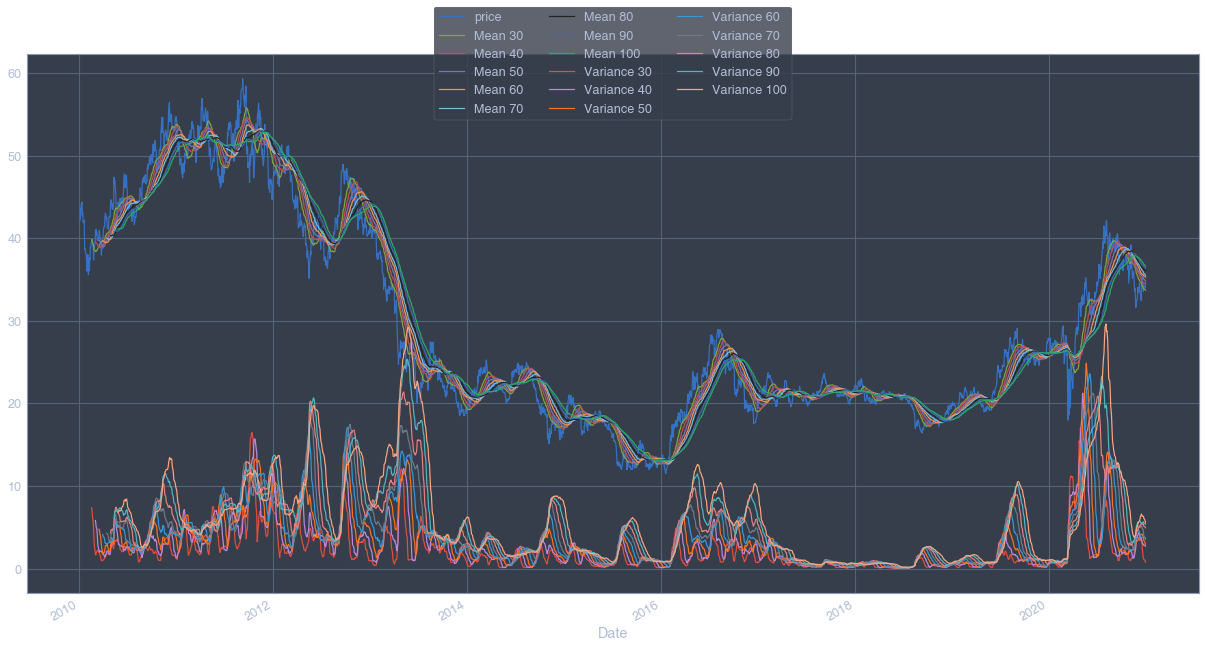

In [29]:
fig, ax = plt.subplots(1, figsize=(21, 11))

tickers['GDX'][['price']+mean_size+var_size].plot(ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

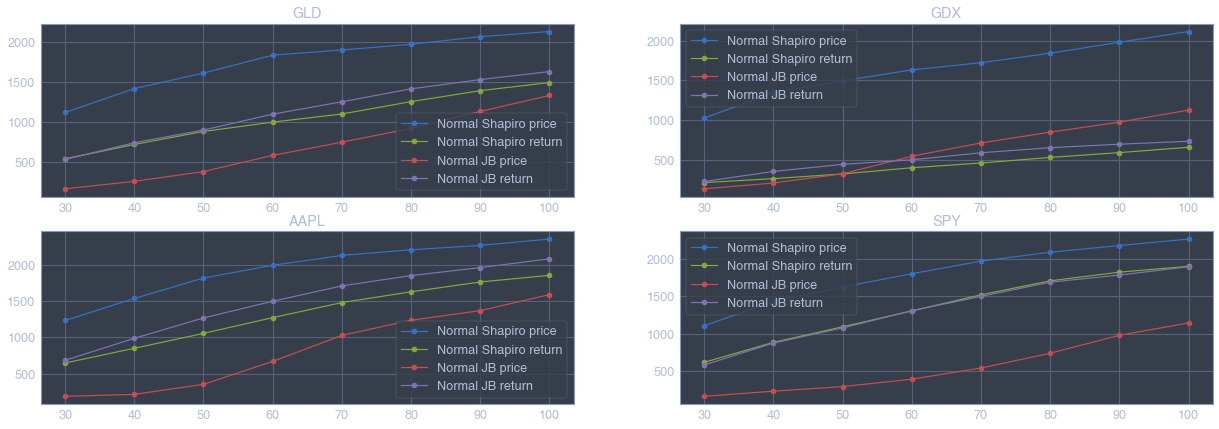

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(21, 7))

for ticker, coord in zip(tickers.keys(), [(i, j) for i in range(2) for j in range(2)]):
    axs[coord].plot(tickers[ticker].sum()[normal_shapiro_size].to_list(), 'o-', label='Normal Shapiro price')
    axs[coord].plot(tickers[ticker].sum()[normal_shapiro_return_size].to_list(), 'o-', label='Normal Shapiro return')
    axs[coord].plot(tickers[ticker].sum()[normal_jb_size].to_list(), 'o-', label='Normal JB price')
    axs[coord].plot(tickers[ticker].sum()[normal_jb_return_size].to_list(), 'o-', label='Normal JB return')
    axs[coord].set_xticks(axs[coord].get_xticks().tolist()[1:-1])
    axs[coord].set_xticklabels(x_ticks)
    axs[coord].set_title(ticker)
    axs[coord].legend()
    

In [22]:
def show_normal_for(ticker, test='shapiro'):
    normal, normal_return = get_cols_for(test)
    
    for normal_price, normal_return in zip(normal, normal_return):
        fig, ax = plt.subplots(1, 2, figsize=(21, 7))
        ax[0].plot(tickers[ticker]['price'], c='g', label=ticker)
        ax_ = ax[0].twinx()
        tickers[ticker][normal_price].plot(kind='area', ax=ax_, color=['b'], alpha=0.5, label=normal_price)

        ax[1].plot(tickers[ticker]['return'], c='g', label=ticker)
        ax_ = ax[1].twinx()
        tickers[ticker][normal_return].plot(kind='area', ax=ax_, color=['b'], alpha=0.5, label=normal_return)

        ax[0].set_title(f'{ticker} normal price for {normal_price}({test})')
        ax[1].set_title(f'{ticker} normal return for {normal_return}({test})')
        ax[0].legend()
        ax[1].legend()
        

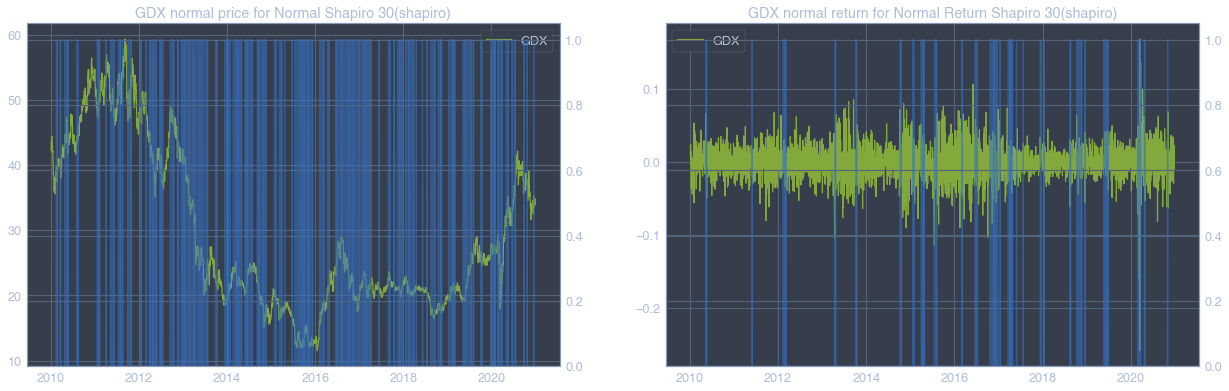

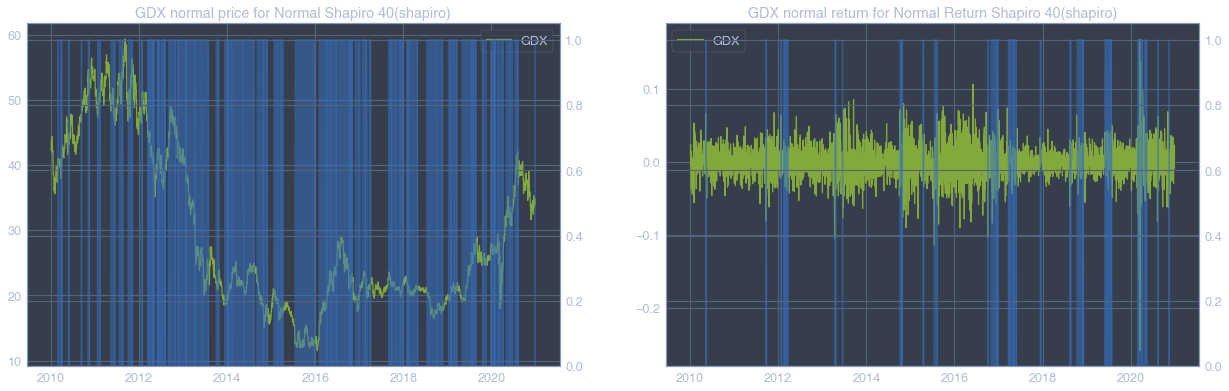

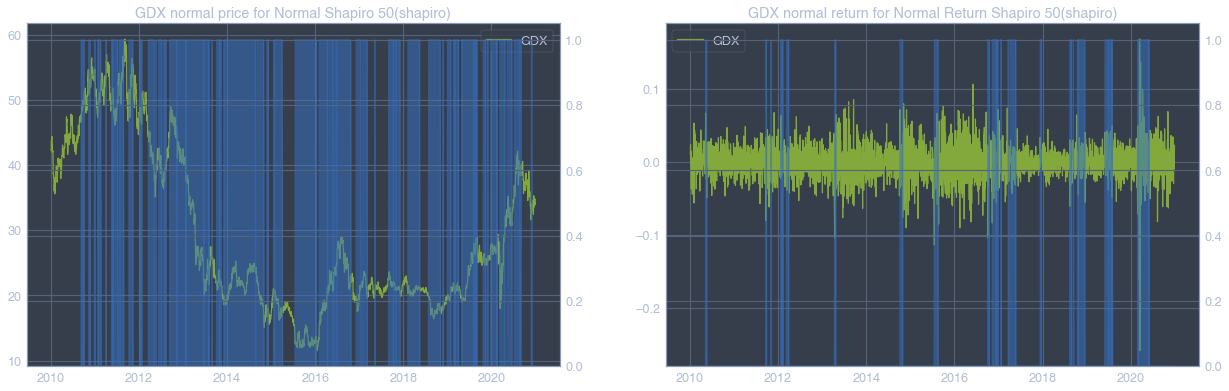

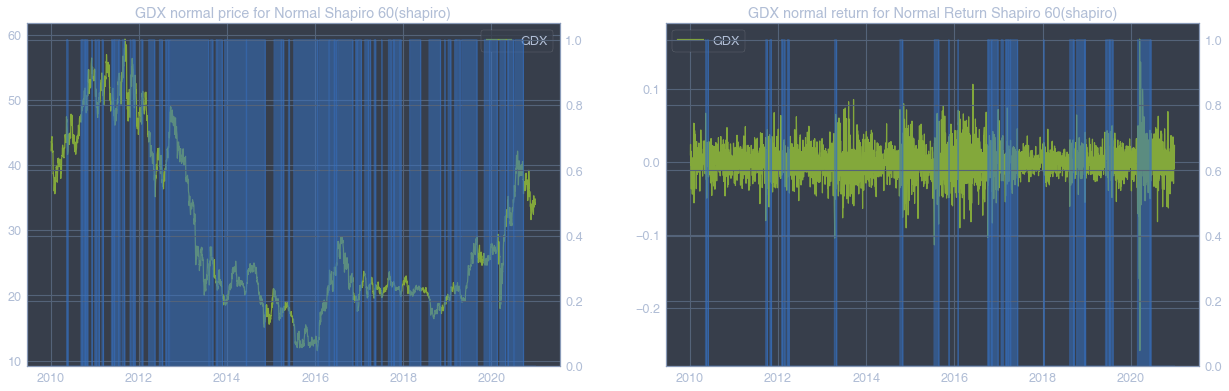

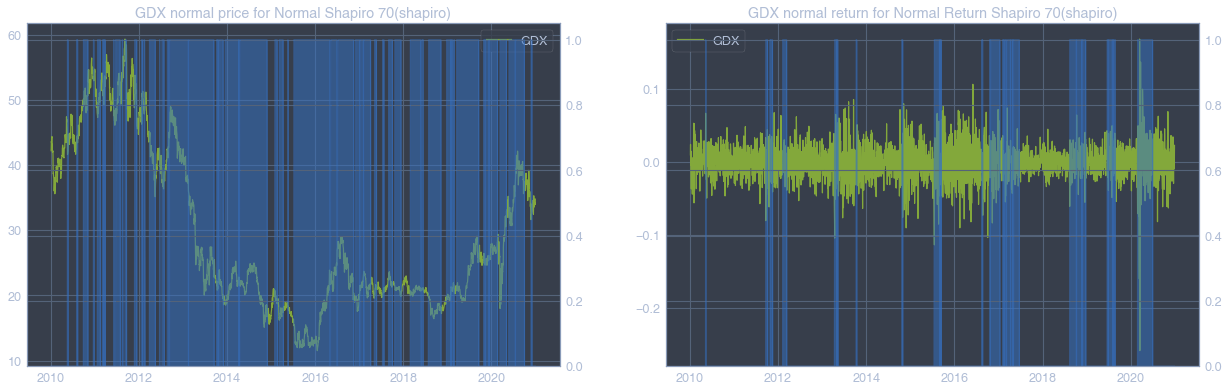

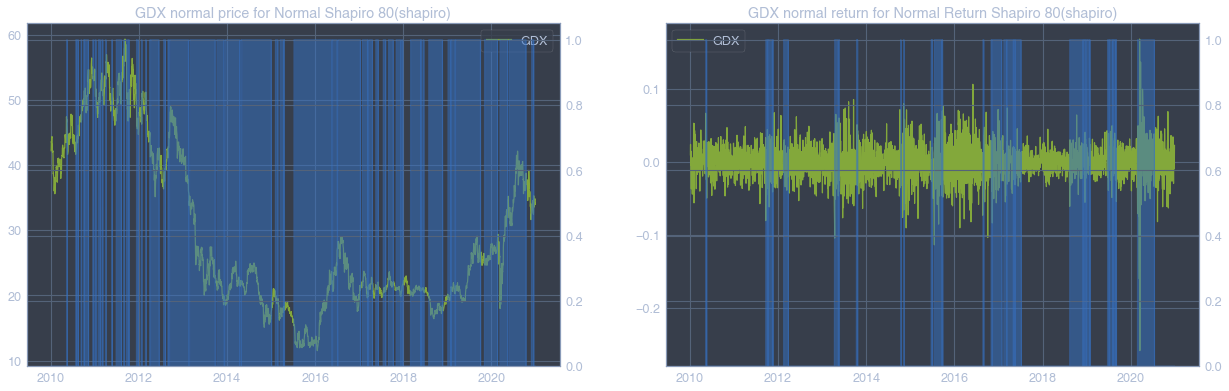

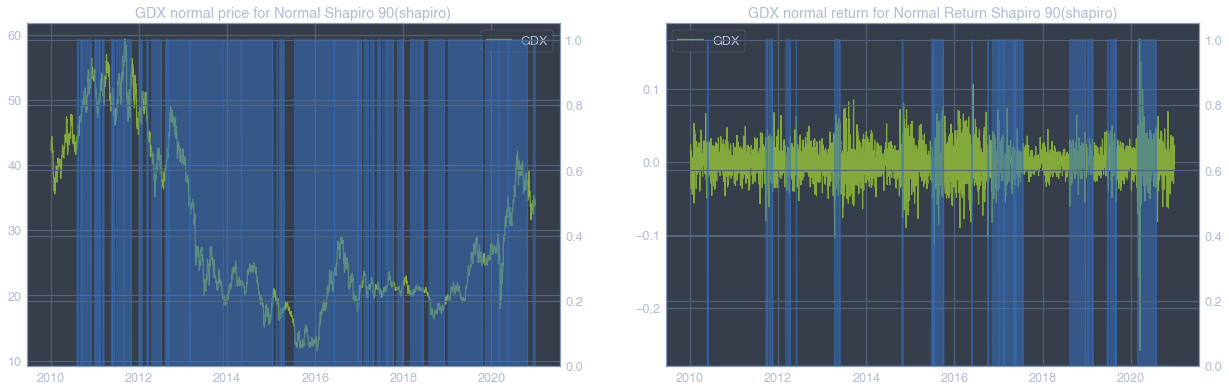

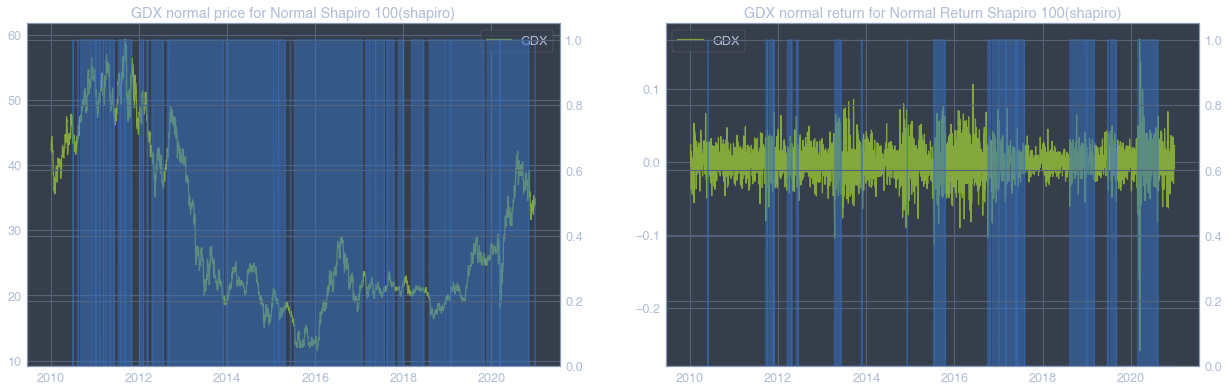

In [23]:
show_normal_for('GDX')

In [6]:
for ticker in tickers.keys():
    for sample in range(30, 110, 10):
        tickers[ticker][f'Normal cumsum JB {sample}'] = tickers[ticker][f'Normal JB {sample}'].cumsum()
        tickers[ticker][f'Normal Return cumsum JB {sample}'] = tickers[ticker][f'Normal Return JB {sample}'].cumsum()
        
        tickers[ticker][f'Normal cumsum Shapiro {sample}'] = tickers[ticker][f'Normal Shapiro {sample}'].cumsum()
        tickers[ticker][f'Normal Return cumsum Shapiro {sample}'] = tickers[ticker][f'Normal Return Shapiro {sample}'].cumsum()

tickers['SPY'].sample(10)

,price,return,Normal JB 30,Normal Shapiro 30,Mean 30,Variance 30,Normal Return JB 30,Normal Return Shapiro 30,Mean Return 30,Variance Return 30,...,Normal cumsum Shapiro 80,Normal Return cumsum Shapiro 80,Normal cumsum JB 90,Normal Return cumsum JB 90,Normal cumsum Shapiro 90,Normal Return cumsum Shapiro 90,Normal cumsum JB 100,Normal Return cumsum JB 100,Normal cumsum Shapiro 100,Normal Return cumsum Shapiro 100
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-01,110.137917,-0.000871,0.0,0.0,108.357911,2.543268,0.0,0.0,0.000461,0.000108,...,396.0,268.0,122.0,253.0,420.0,306.0,162.0,297.0,425.0,340.0
2011-01-13,99.690269,-0.001635,0.0,0.0,97.220523,2.332906,0.0,0.0,0.002143,0.000016,...,121.0,99.0,22.0,68.0,129.0,112.0,33.0,88.0,130.0,122.0
2012-01-26,104.564781,-0.005143,0.0,0.0,100.851900,8.111961,1.0,0.0,0.002208,0.000076,...,298.0,235.0,103.0,212.0,308.0,274.0,134.0,252.0,315.0,300.0
2019-11-06,284.280579,0.000228,0.0,0.0,276.183472,25.299156,0.0,0.0,0.001045,0.000055,...,1892.0,1431.0,915.0,1496.0,1962.0,1542.0,1054.0,1607.0,2015.0,1618.0
2019-04-17,265.419403,-0.002450,0.0,0.0,259.916245,19.799809,1.0,0.0,0.001572,0.000042,...,1809.0,1297.0,890.0,1355.0,1872.0,1401.0,1015.0,1466.0,1916.0,1481.0
2020-02-25,290.840973,-0.030771,0.0,0.0,307.316312,28.947536,1.0,1.0,-0.001364,0.000127,...,1948.0,1495.0,915.0,1570.0,2029.0,1609.0,1064.0,1681.0,2082.0,1687.0
2010-09-03,85.208878,0.012888,0.0,0.0,84.075990,3.850370,0.0,0.0,0.000145,0.000137,...,79.0,56.0,22.0,44.0,81.0,54.0,26.0,45.0,71.0,59.0
2015-05-13,177.833344,0.000190,0.0,0.0,177.413074,1.705047,0.0,0.0,0.000575,0.000037,...,962.0,644.0,336.0,677.0,1016.0,716.0,440.0,747.0,1011.0,770.0
2016-05-05,177.261078,-0.000195,0.0,0.0,178.755198,3.175859,0.0,0.0,0.000287,0.000038,...,1197.0,724.0,537.0,768.0,1250.0,798.0,649.0,842.0,1257.0,855.0


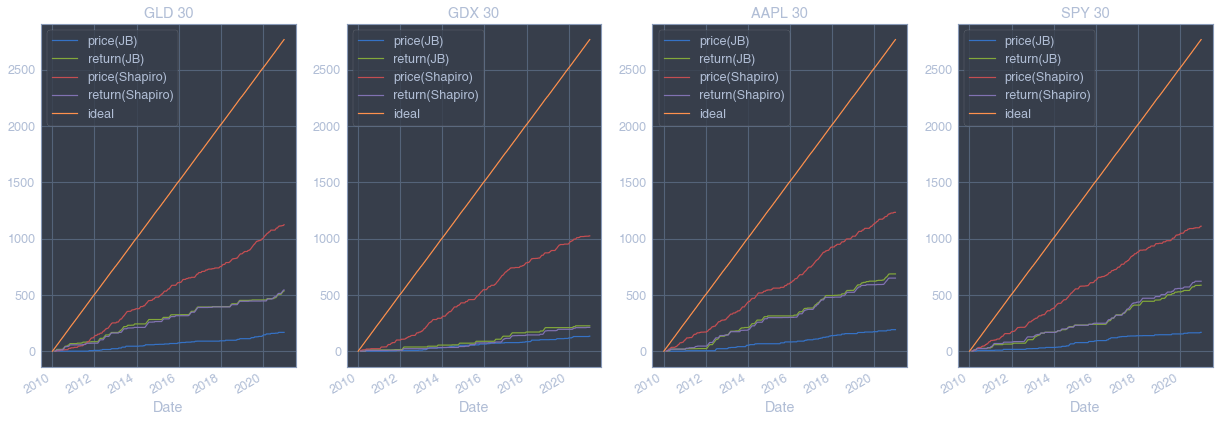

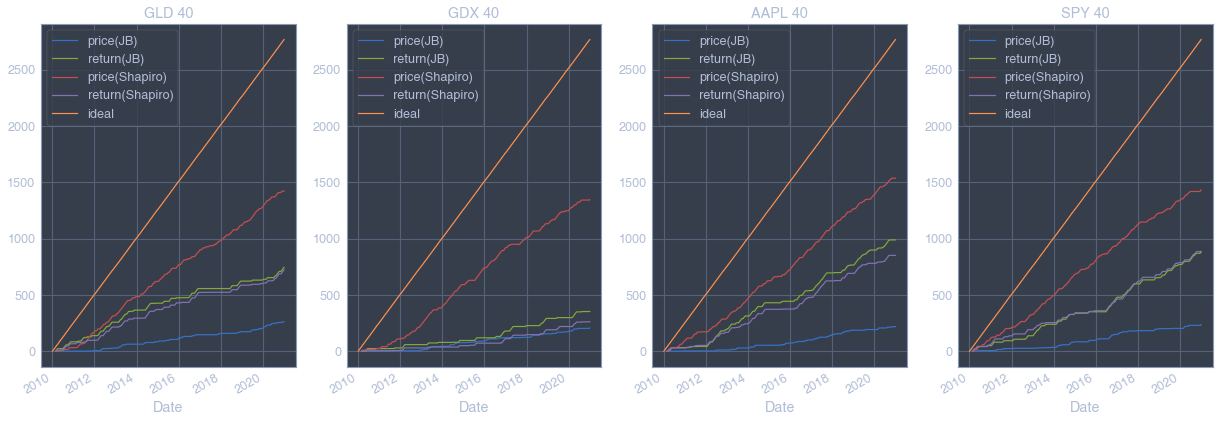

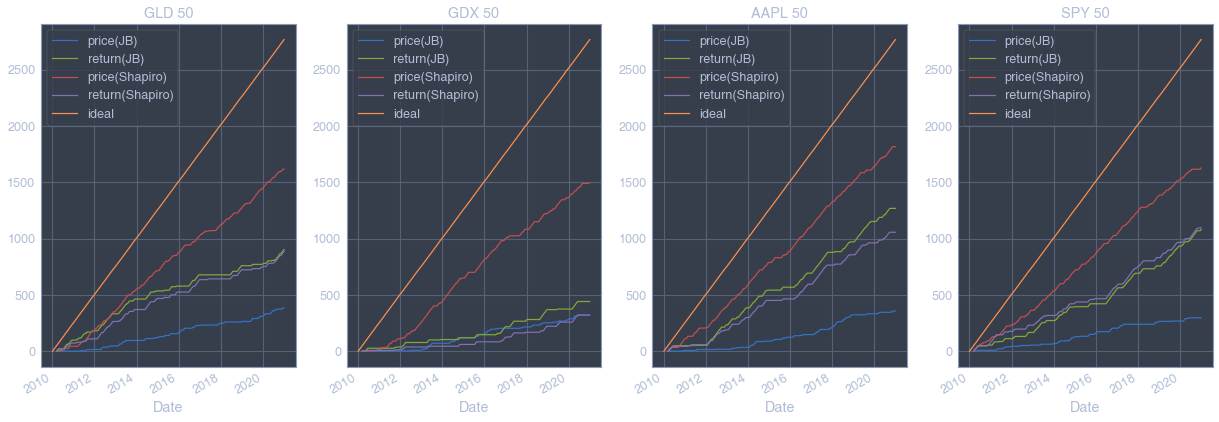

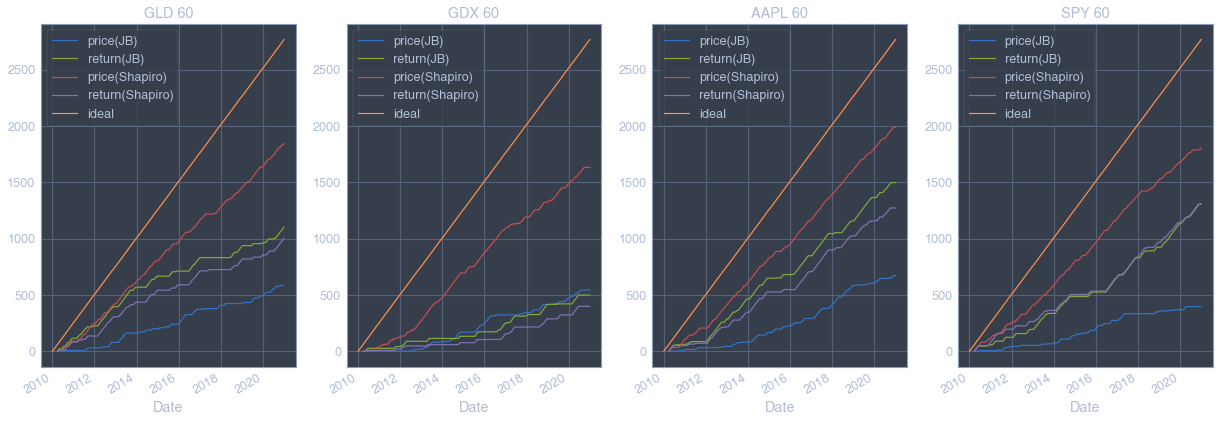

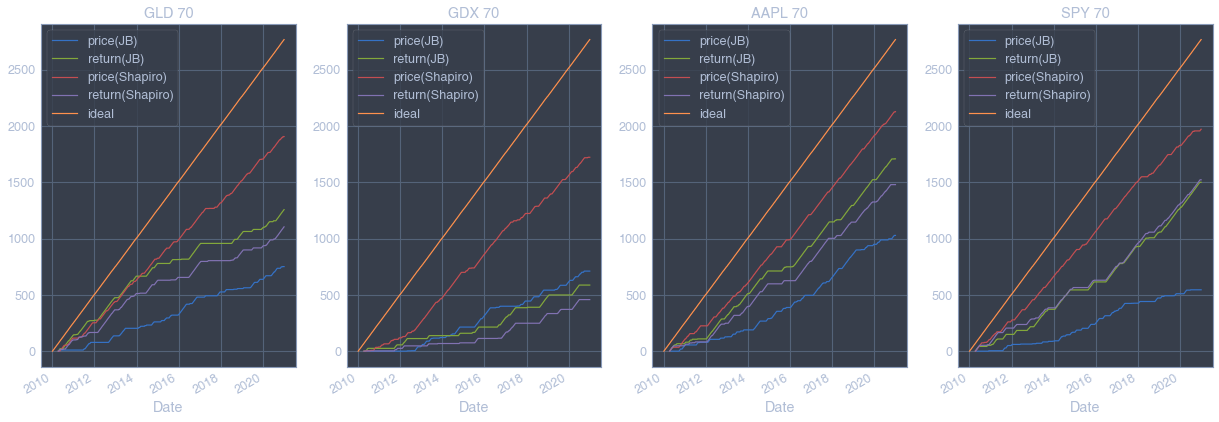

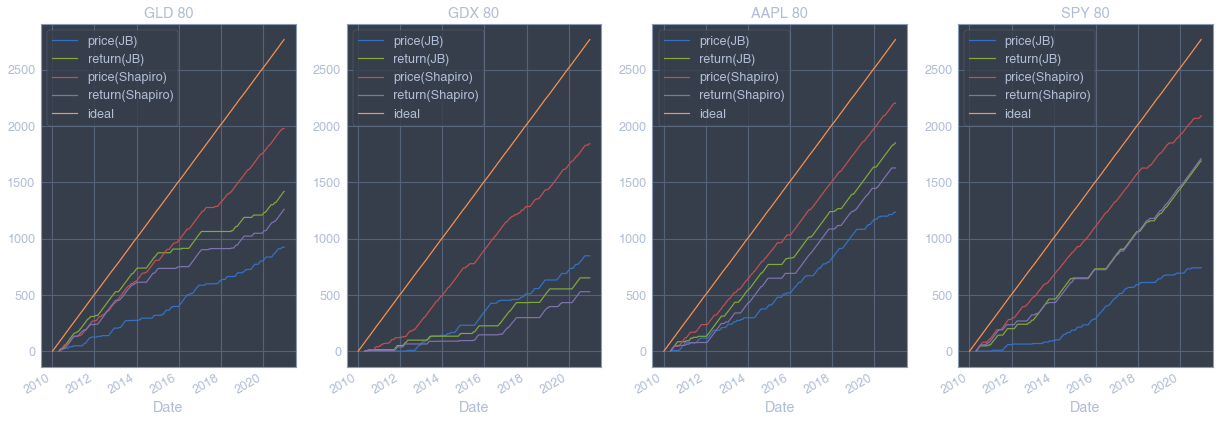

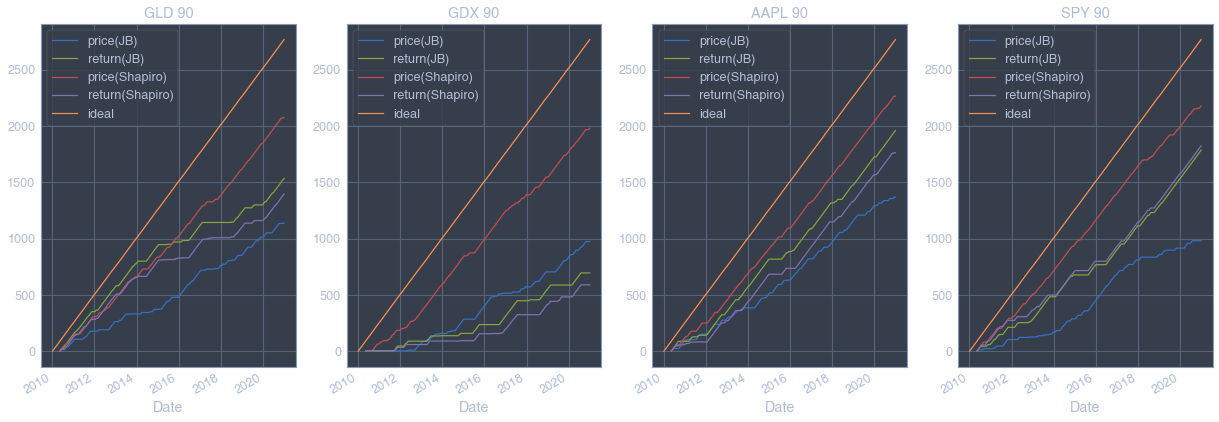

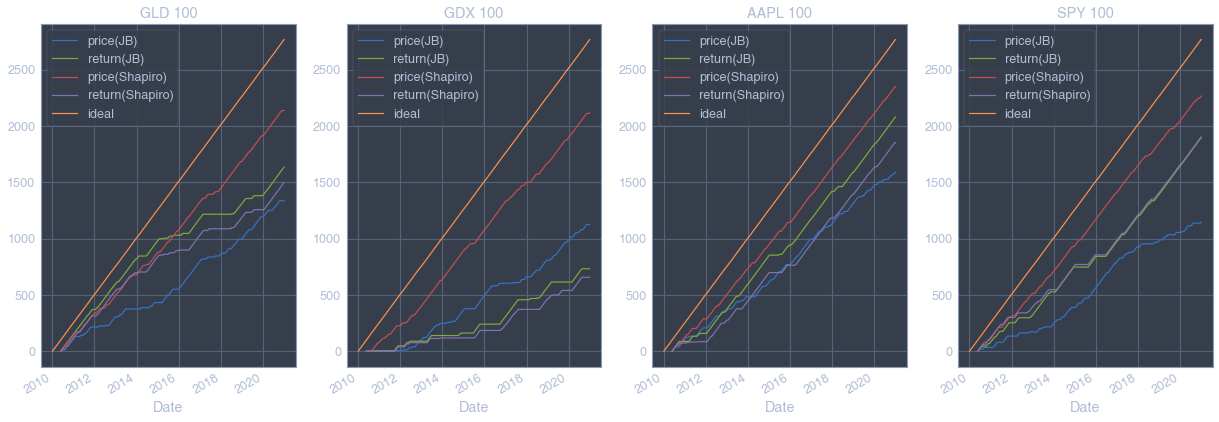

In [12]:
for sample in range(30, 110, 10):
    fig, axs = plt.subplots(1, 4, figsize=(21, 7))
    for i, ticker in enumerate(tickers.keys()):
        tickers[ticker][f'Normal cumsum JB {sample}'].plot(ax=axs[i], label='price(JB)')
        tickers[ticker][f'Normal Return cumsum JB {sample}'].plot(ax=axs[i], label='return(JB)')
        tickers[ticker][f'Normal cumsum Shapiro {sample}'].plot(ax=axs[i], label='price(Shapiro)')
        tickers[ticker][f'Normal Return cumsum Shapiro {sample}'].plot(ax=axs[i], label='return(Shapiro)')
        axs[i].plot(tickers[ticker].index, np.arange(len(tickers[ticker].index)), label='ideal')
        axs[i].set_title(ticker + ' ' + str(sample))
        axs[i].legend()

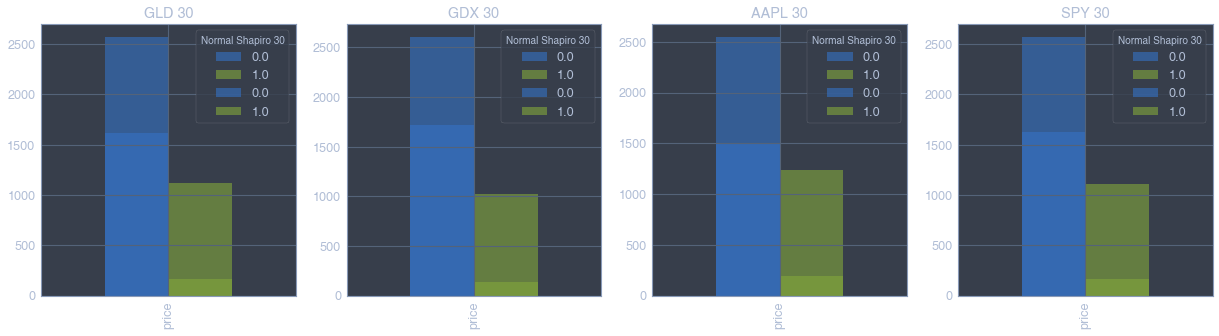

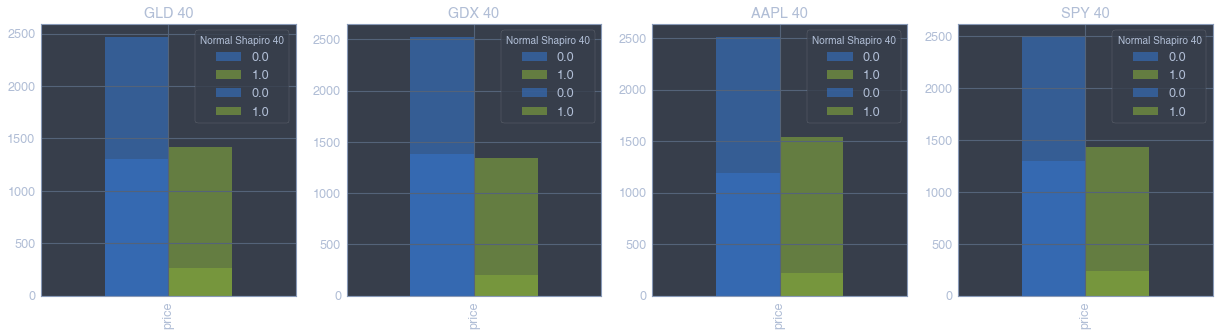

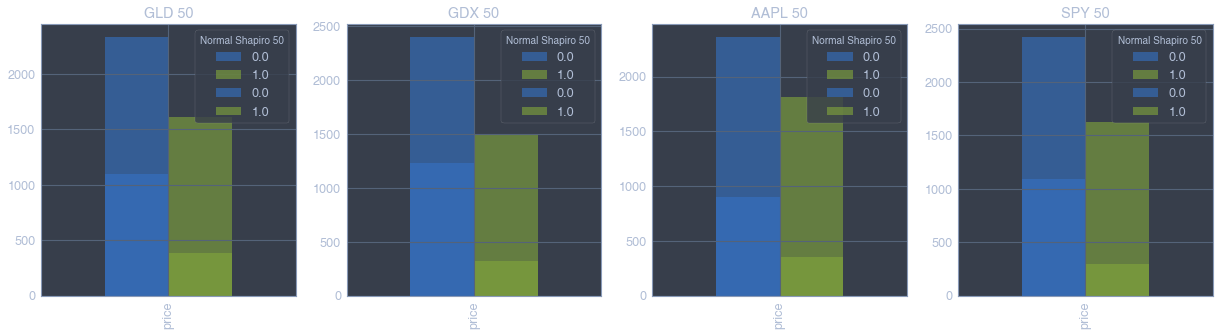

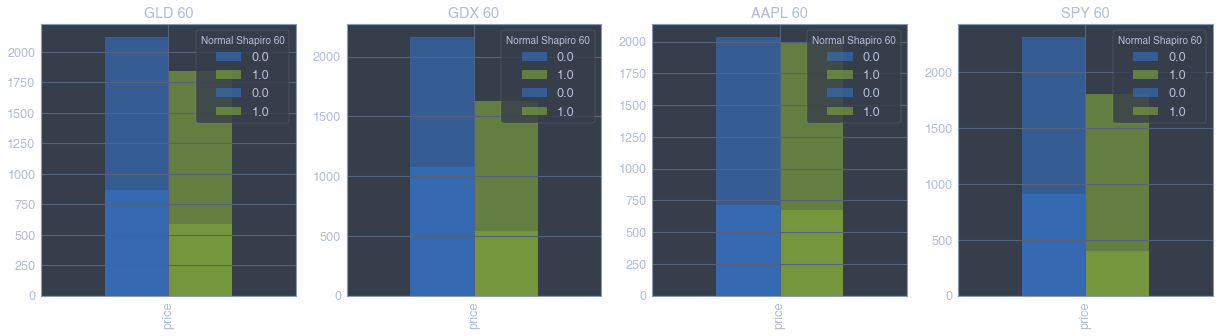

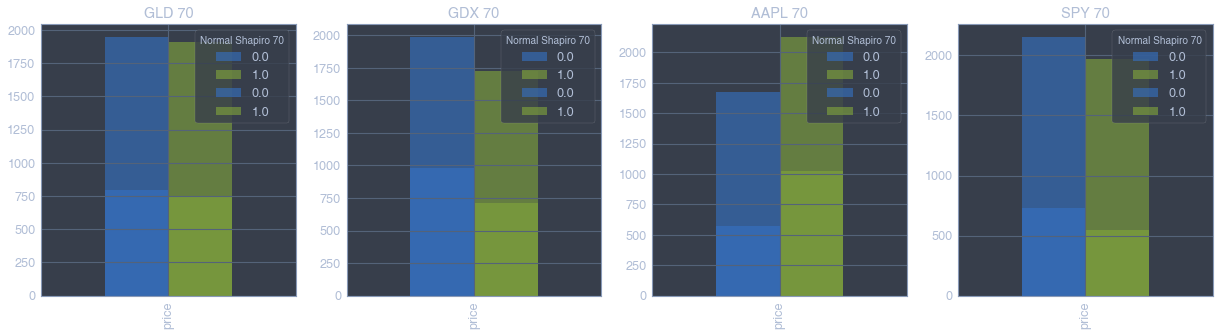

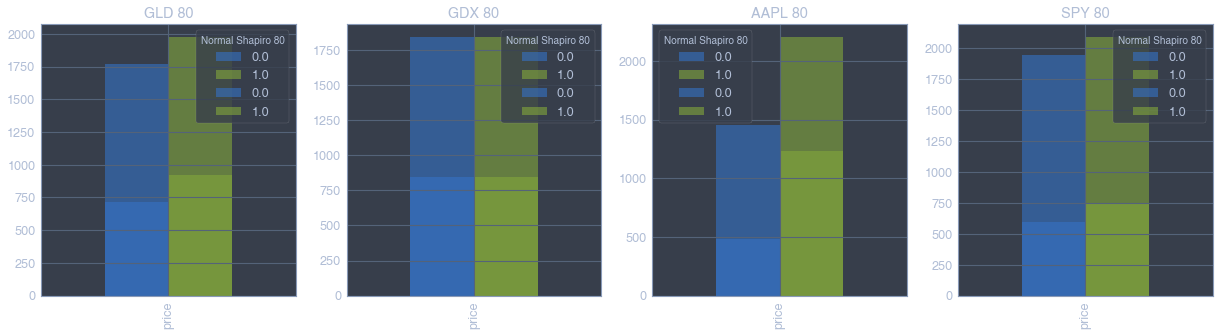

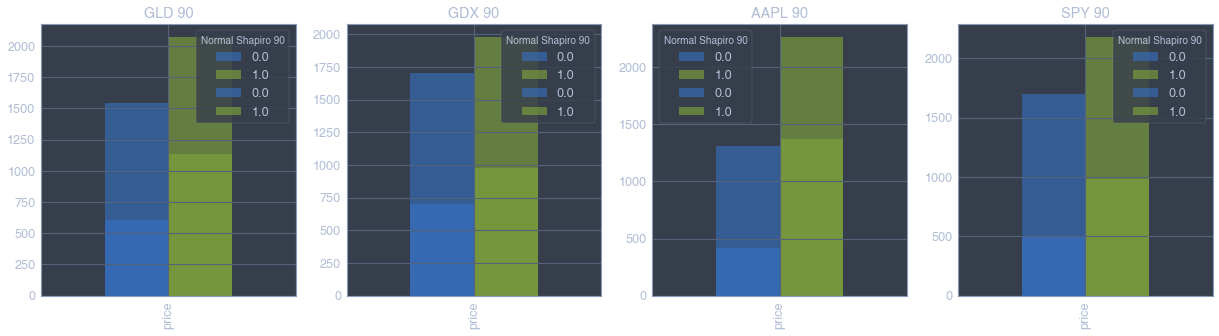

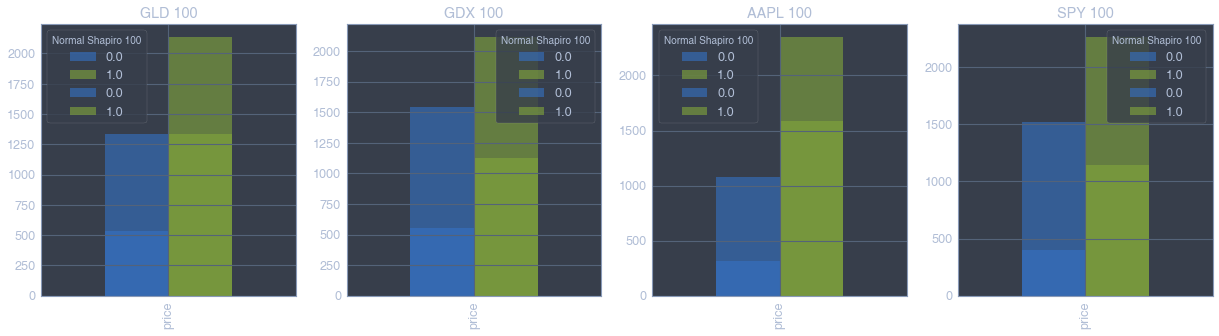

In [11]:
for sample in range(30, 110, 10):
    fig, axs = plt.subplots(1, 4, figsize=(21, 5))
    for i, ticker in enumerate(tickers.keys()):
        tickers[ticker].groupby(f'Normal JB {sample}').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i], alpha=.6)
        tickers[ticker].groupby(f'Normal Shapiro {sample}').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i], alpha=.6)
        axs[i].set_title(f'{ticker} {sample}')

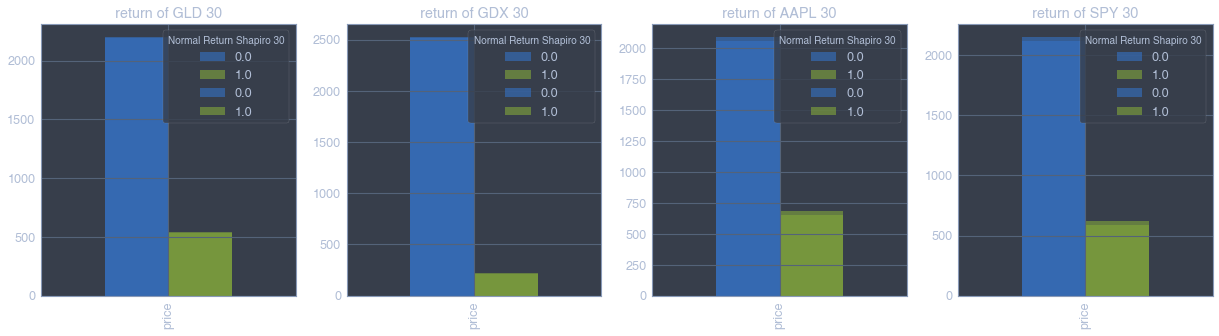

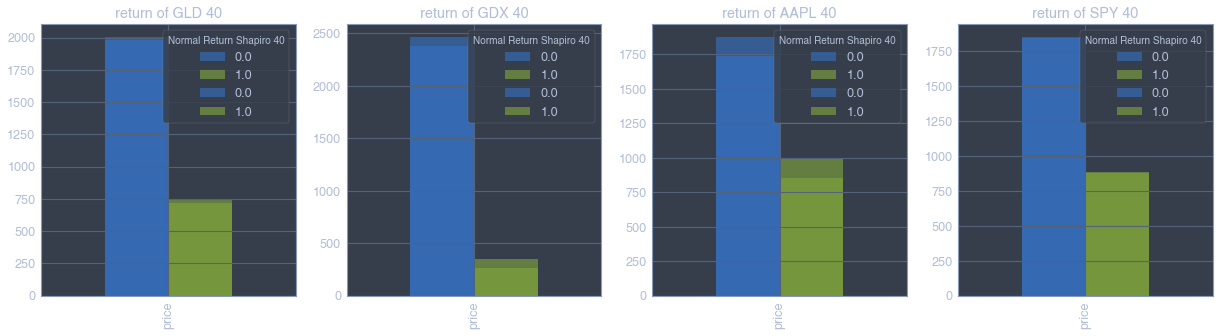

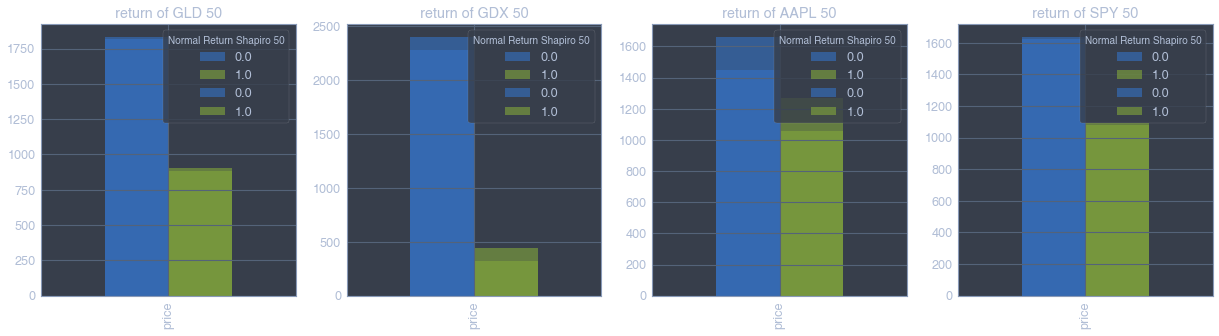

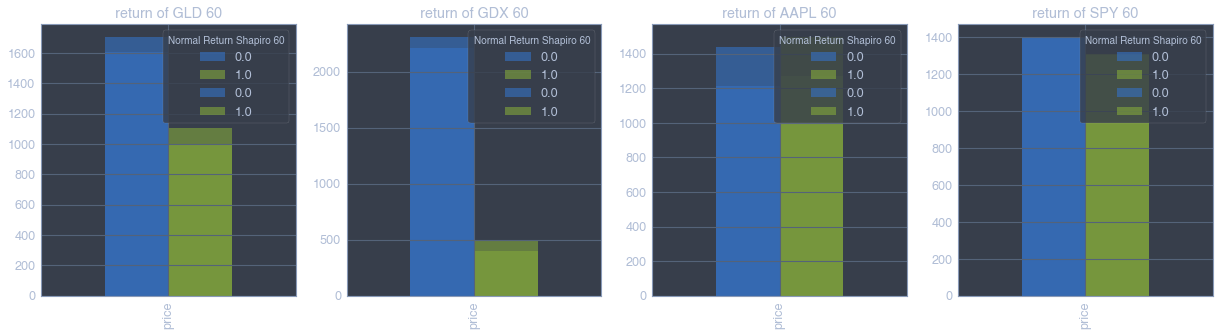

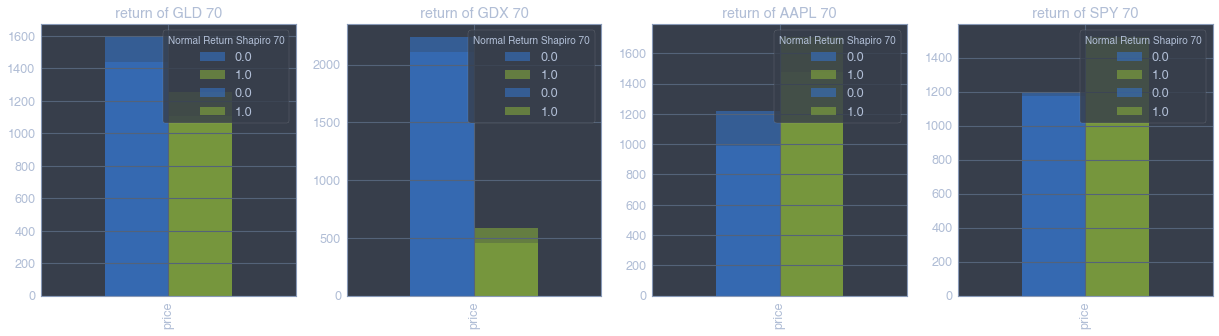

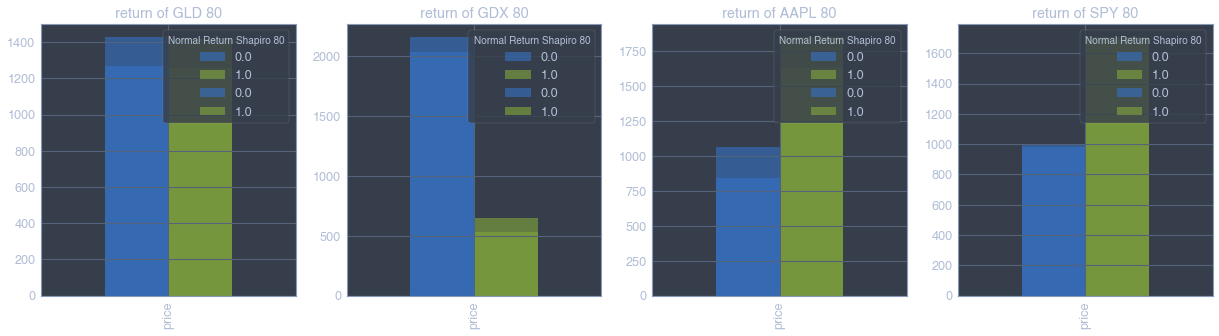

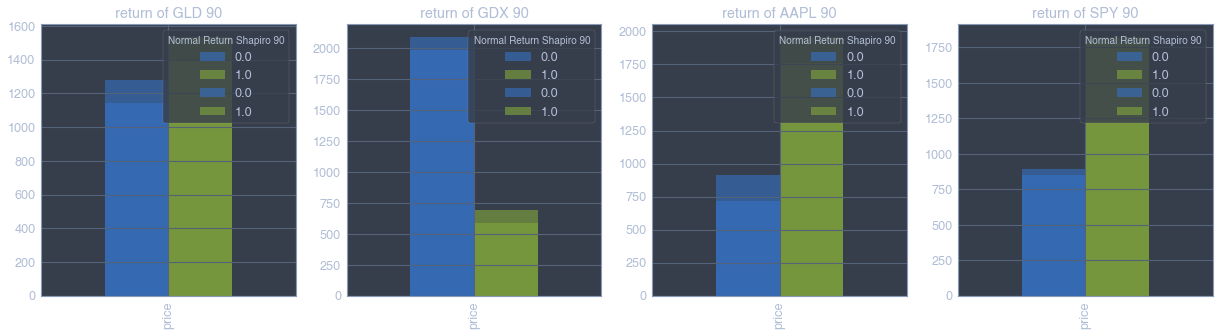

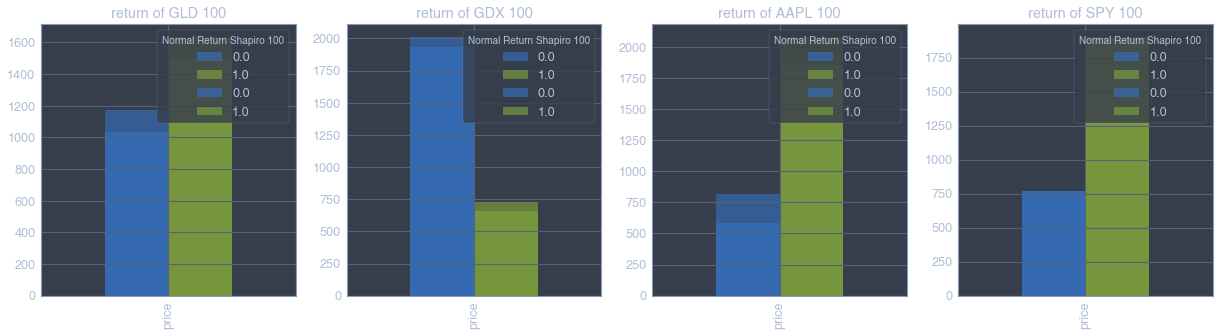

In [26]:
for sample in range(30, 110, 10):
    fig, axs = plt.subplots(1, 4, figsize=(21, 5))
    for i, ticker in enumerate(tickers.keys()):
        tickers[ticker].groupby(f'Normal Return JB {sample}').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i], alpha=.6)
        tickers[ticker].groupby(f'Normal Return Shapiro {sample}').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i], alpha=.6)
        axs[i].set_title(f'return of {ticker} {sample}')

In [7]:
for ticker, data in tickers.items():
    data['trend'] = np.sign(data['return'])

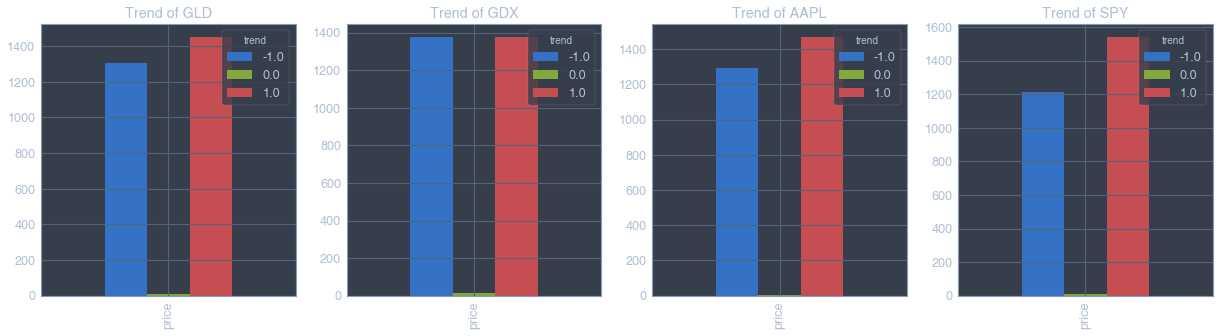

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(21, 5))
for i, ticker in enumerate(tickers.keys()):
    tickers[ticker].groupby('trend').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Trend of {ticker}')

In [9]:
def show_normal_place_for(ticker, test='shapiro'):
    normal, normal_return = get_cols_for(test)
    for normal_price, normal_return in zip(normal, normal_return):
        normal_price_and_return = tickers[ticker][
            (tickers[ticker][normal_price]==1)
            & ((tickers[ticker][normal_return]==1))
        ]['price']

        fig, ax = plt.subplots(1, figsize=(21, 5))
        tickers[ticker]['price'].plot(ax=ax)
        ax.scatter(normal_price_and_return.index, normal_price_and_return, c='g')
        ax.set_title(f'Place with normal price and return for {ticker} with normal({test}) size {normal_price[7:]}')
    

In [10]:
tickers.keys()

dict_keys(['AAPL', 'GDX', 'GLD', 'SPY'])

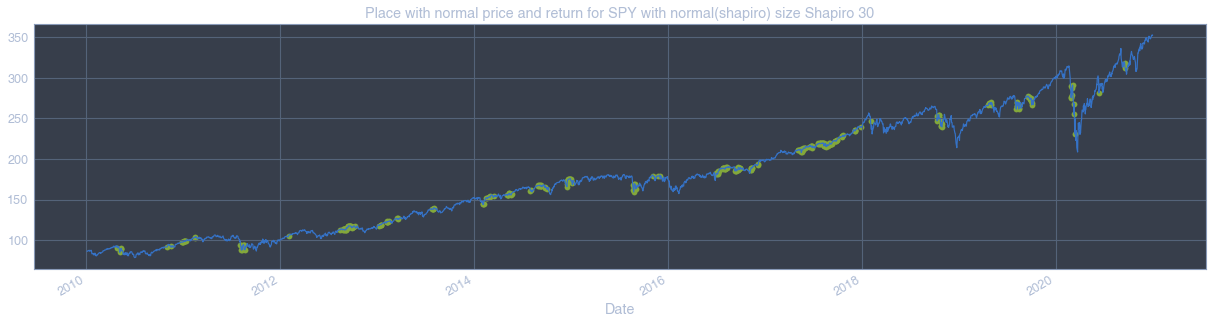

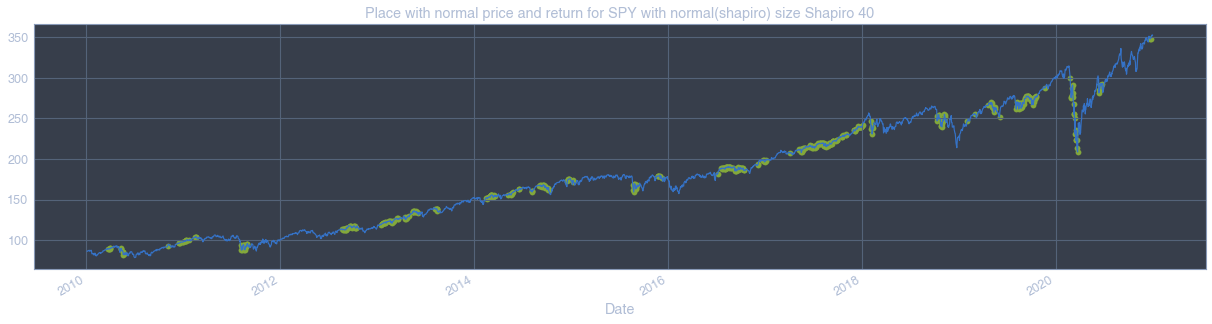

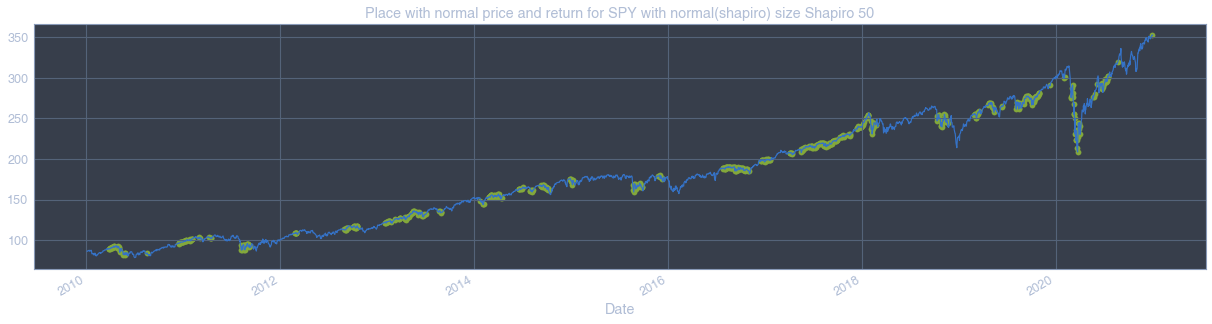

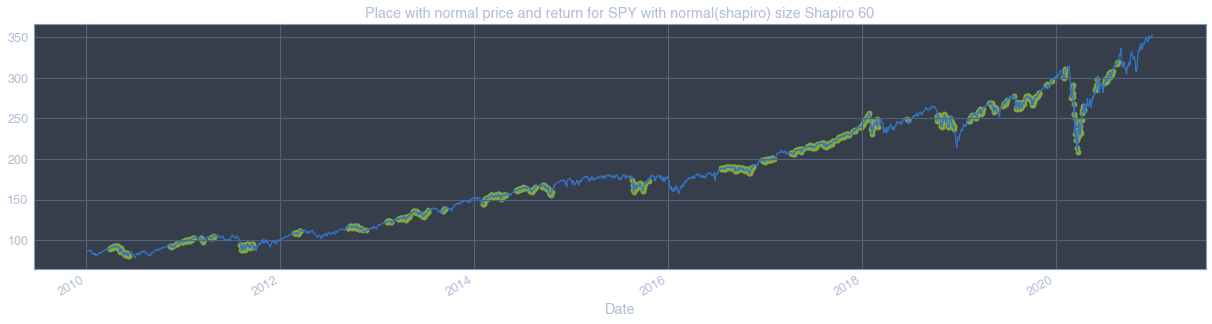

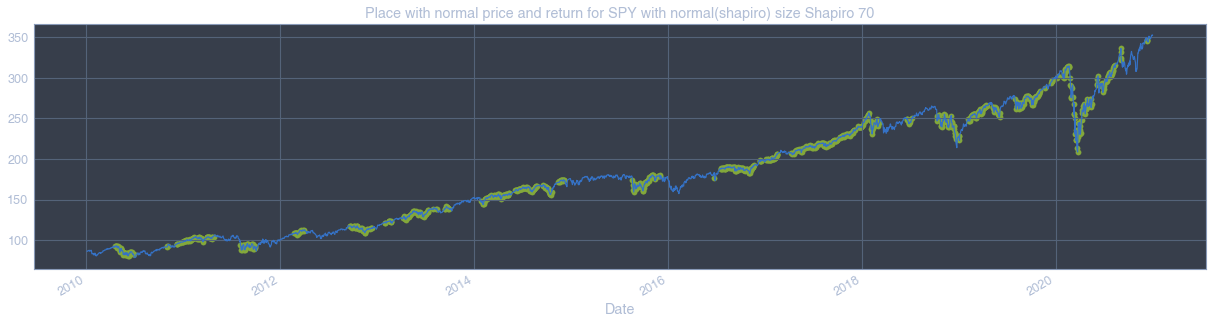

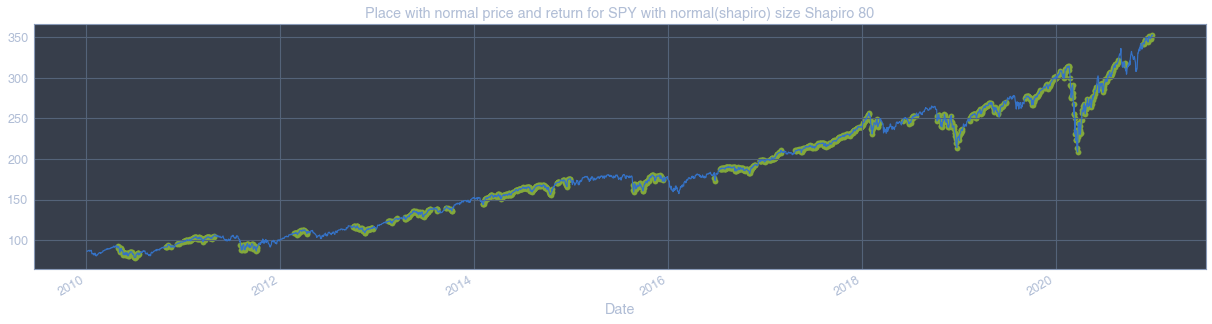

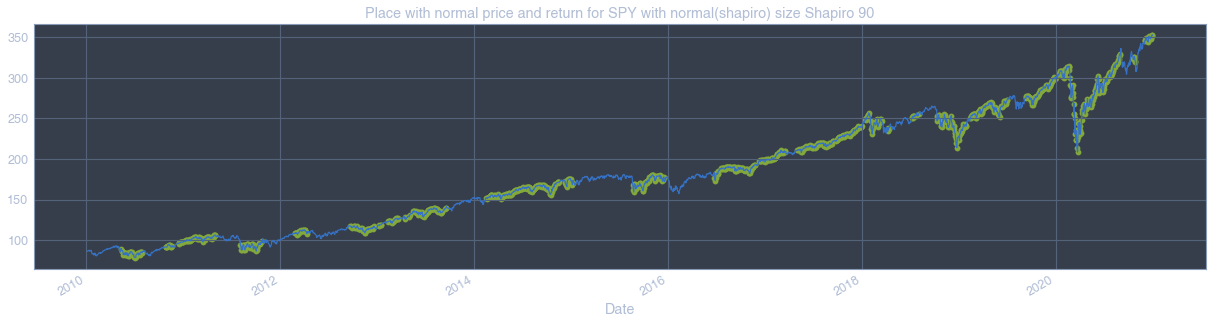

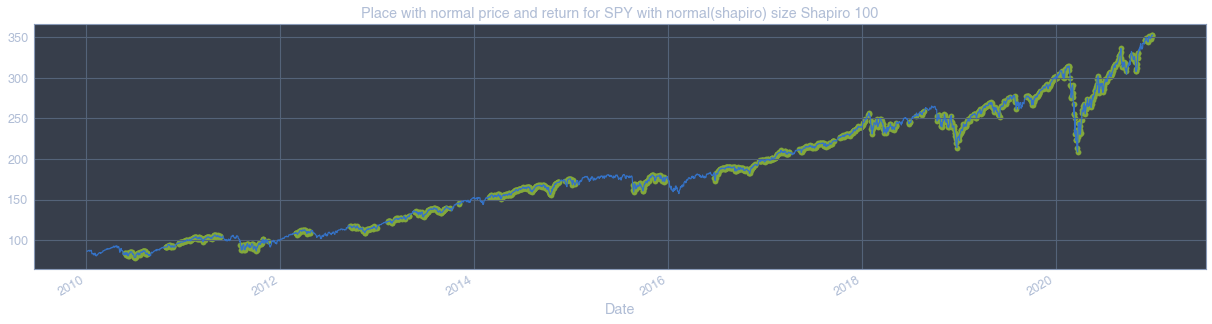

In [11]:
show_normal_place_for('SPY')

## Review of Normal Intervals

In [12]:
aapl = tickers['AAPL']
aapl.sample(10)

,price,return,Normal JB 30,Normal Shapiro 30,Mean 30,Variance 30,Normal Return JB 30,Normal Return Shapiro 30,Mean Return 30,Variance Return 30,...,Normal Return cumsum Shapiro 80,Normal cumsum JB 90,Normal Return cumsum JB 90,Normal cumsum Shapiro 90,Normal Return cumsum Shapiro 90,Normal cumsum JB 100,Normal Return cumsum JB 100,Normal cumsum Shapiro 100,Normal Return cumsum Shapiro 100,trend
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,39.987095,0.022970,0.0,0.0,40.131258,1.121840,0.0,0.0,-0.001200,0.000347,...,1116.0,1052.0,1348.0,1644.0,1195.0,1217.0,1462.0,1716.0,1236.0,1.0
2010-12-09,9.643904,-0.003902,0.0,1.0,9.430668,0.034948,0.0,0.0,0.001267,0.000171,...,51.0,79.0,87.0,104.0,57.0,92.0,87.0,108.0,72.0,-1.0
2010-06-07,7.568310,-0.019807,0.0,0.0,7.687640,0.068205,0.0,0.0,-0.002543,0.000672,...,27.0,17.0,17.0,18.0,17.0,8.0,7.0,8.0,7.0,-1.0
2014-11-24,26.447292,0.018376,0.0,0.0,23.995134,1.921881,0.0,0.0,0.005902,0.000107,...,633.0,484.0,793.0,884.0,659.0,589.0,824.0,923.0,672.0,1.0
2020-06-22,87.518173,0.025827,0.0,1.0,80.002211,14.867146,1.0,1.0,0.004866,0.000267,...,1539.0,1337.0,1826.0,2157.0,1663.0,1525.0,1947.0,2232.0,1726.0,1.0
2011-03-16,9.953042,-0.045668,0.0,0.0,10.595832,0.049709,0.0,1.0,-0.001484,0.000247,...,63.0,103.0,89.0,153.0,70.0,131.0,88.0,162.0,79.0,-1.0
2011-02-15,10.854522,0.002002,0.0,0.0,10.367975,0.069412,0.0,0.0,0.002935,0.000149,...,62.0,101.0,88.0,133.0,68.0,122.0,87.0,148.0,76.0,1.0
2017-02-10,30.755878,-0.002268,0.0,1.0,28.353631,1.623783,1.0,1.0,0.004264,0.000135,...,902.0,827.0,1109.0,1342.0,954.0,1001.0,1201.0,1410.0,980.0,-1.0
2016-03-23,24.194263,-0.005544,0.0,1.0,22.826000,0.914925,0.0,0.0,0.003696,0.000163,...,691.0,684.0,908.0,1145.0,736.0,821.0,980.0,1196.0,764.0,-1.0


In [13]:
aapl.shape

(2768, 99)

In [48]:
def get_interval(ticker, date, interval):
    start = tickers[ticker].index.get_loc(date)-interval-1
    end = tickers[ticker].index.get_loc(date)+1
    return tickers[ticker].iloc[start:end]

In [49]:
normal = aapl[aapl['Normal Shapiro 50']==1].index
normal_return =  aapl[aapl['Normal Return Shapiro 50']==1].index
normal.shape, normal_return.shape

((1816,), (1056,))

In [51]:
normal_intervals = []
for n in normal:
    intv = get_interval('AAPL', n, 50)
    if not intv.empty:
        normal_intervals.append(intv)


In [52]:
normal_return_intervals = []
for n in normal_return:
    intv = get_interval('AAPL', n, 50)
    if not intv.empty:
        normal_return_intervals.append(intv)
    

In [53]:
normal_intervals[0].tail()

,price,return,Normal JB 30,Normal Shapiro 30,Mean 30,Variance 30,Normal Return JB 30,Normal Return Shapiro 30,Mean Return 30,Variance Return 30,...,Normal Return cumsum Shapiro 80,Normal cumsum JB 90,Normal Return cumsum JB 90,Normal cumsum Shapiro 90,Normal Return cumsum Shapiro 90,Normal cumsum JB 100,Normal Return cumsum JB 100,Normal cumsum Shapiro 100,Normal Return cumsum Shapiro 100,trend
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-12,6.834219,0.004866,0.0,1.0,6.177789,0.100958,1.0,1.0,0.004281,0.000245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-03-15,6.750978,-0.012255,0.0,1.0,6.209738,0.106112,0.0,0.0,0.005104,0.000195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2010-03-16,6.769374,0.002721,0.0,1.0,6.239617,0.112079,0.0,0.0,0.004735,0.000193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2010-03-17,6.759421,-0.001471,0.0,1.0,6.268027,0.116748,0.0,0.0,0.004493,0.000194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
2010-03-18,6.775405,0.002362,0.0,1.0,6.293583,0.122632,0.0,0.0,0.004003,0.000188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


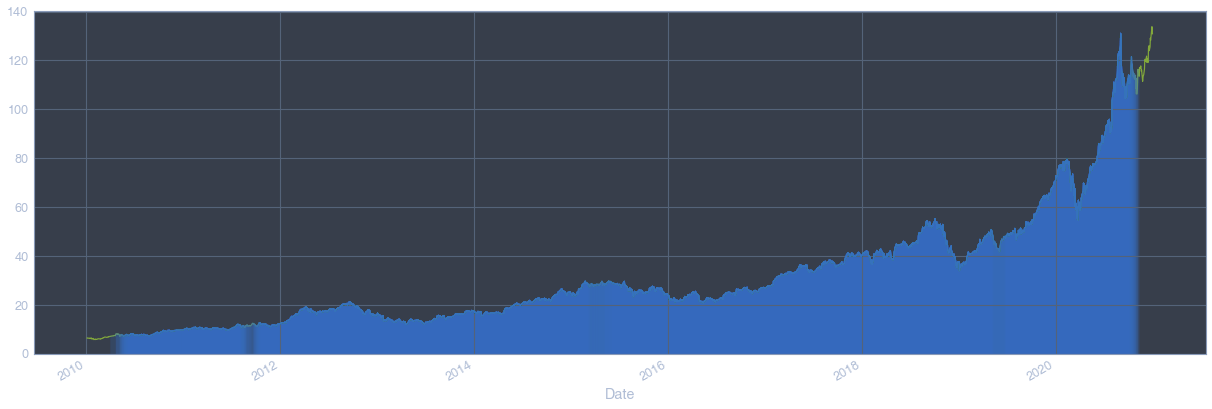

In [18]:
fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['price'], c='g')
for i in normal_intervals:
    i['price'].plot(kind='area', ax=ax, color=['b'], alpha=0.1)

Text(0.5, 1.0, 'AAPL. not normal intervals')

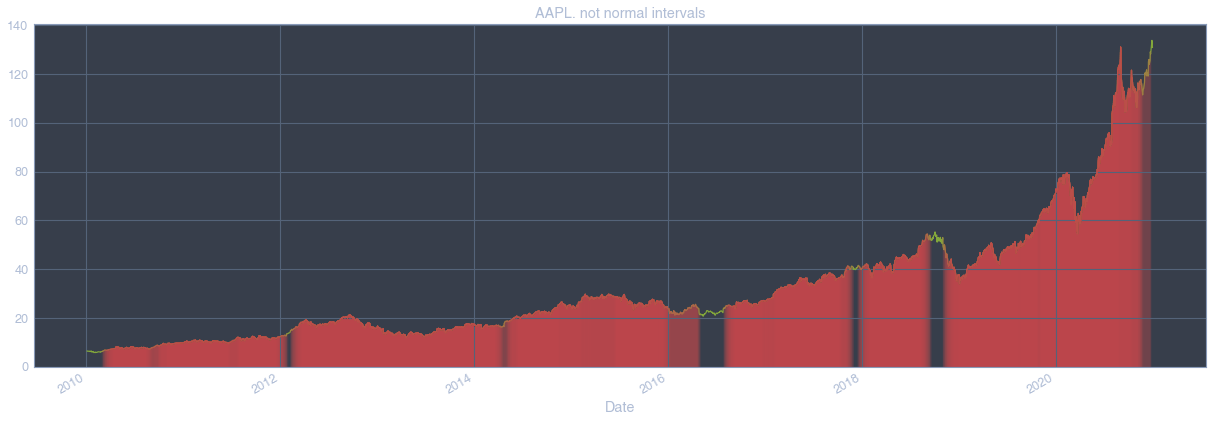

In [59]:
not_normal = aapl[aapl['Normal']==0].index

not_normal_intervals = []
for n in not_normal:
    not_normal_intervals.append(get_interval('AAPL', n))

fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['price'], c='g')
for i in not_normal_intervals:
    i['price'].plot(kind='area', ax=ax, color=['r'], alpha=0.1)
ax.set_title('AAPL. not normal intervals')

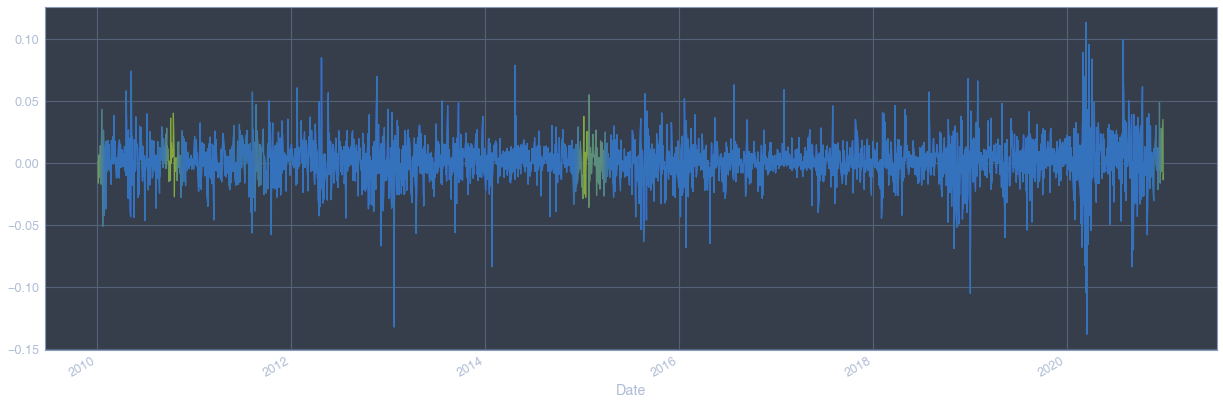

In [25]:
fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['return'], c='g')
for i in normal_return_intervals:
    i['return'].plot(ax=ax, color=['b'], alpha=0.1)
ax.set_title('AAPL. normal intervals')

Text(0.5, 1.0, 'AAPL. not normal intervals')

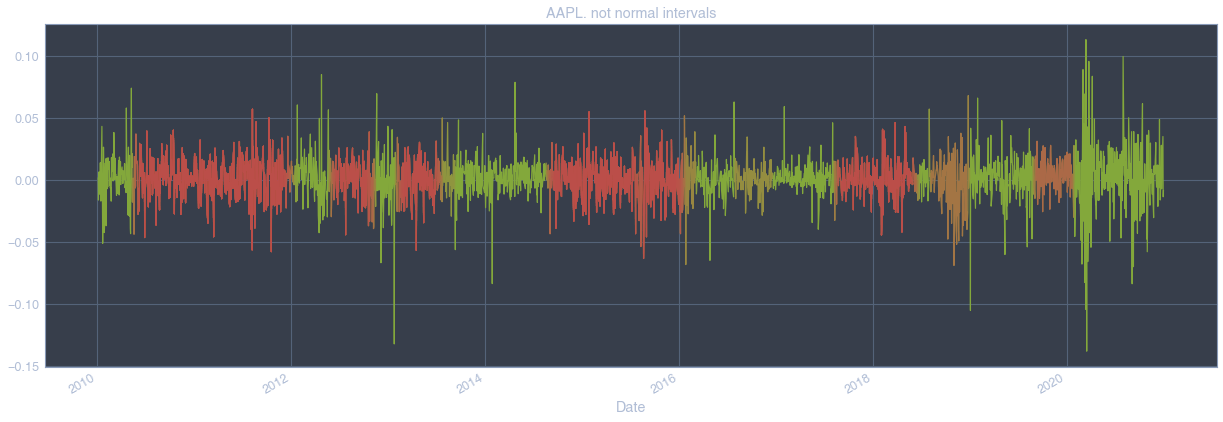

In [27]:
not_normal = aapl[aapl['Normal Return']==0].index

not_normal_reutrn_intervals = []
for n in not_normal:
    not_normal_reutrn_intervals.append(get_interval('AAPL', n))

fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['return'], c='g')
for i in not_normal_reutrn_intervals:
    i['return'].plot(ax=ax, color=['r'], alpha=0.1)
ax.set_title('AAPL. not normal intervals')

In [13]:
# AAPL
len(normal_intervals), len(normal_return_intervals)

(1588, 2080)

In [23]:
normal_intervals[0].tail()

,price,return,Normal,Normal Return,Normal cumsum,Normal Return cumsum,trend
Date,,,,,,,
2010-05-20,7.170802,-0.043537,NaN,NaN,NaN,NaN,-1.0
2010-05-21,7.308330,0.018997,NaN,NaN,NaN,NaN,1.0
2010-05-24,7.442242,0.018157,NaN,NaN,NaN,NaN,1.0
2010-05-25,7.395792,-0.006261,NaN,NaN,NaN,NaN,-1.0
2010-05-26,7.362315,-0.004537,1.0,NaN,1.0,NaN,-1.0


In [24]:
normal_return_intervals[0].tail()

,price,return,Normal,Normal Return,Normal cumsum,Normal Return cumsum,trend
Date,,,,,,,
2010-05-21,7.308330,0.018997,NaN,NaN,NaN,NaN,1.0
2010-05-24,7.442242,0.018157,NaN,NaN,NaN,NaN,1.0
2010-05-25,7.395792,-0.006261,NaN,NaN,NaN,NaN,-1.0
2010-05-26,7.362315,-0.004537,1.0,NaN,1.0,NaN,-1.0
2010-05-27,7.640992,0.037153,1.0,1.0,2.0,1.0,1.0


In [46]:
pos = []
neg = []
for n in normal_intervals:
    result = n.groupby('trend').count()['price'].values
    neg.append(result[0])
    pos.append(result[1])

print(f'Negative trend mean: {np.mean(neg)}')
print(f'Positive trend mean: {np.mean(pos)}')

Negative trend mean: 46.57367758186398
Positive trend mean: 44.41183879093199


In [48]:
pos = []
neg = []
for n in normal_return_intervals:
    result = n.groupby('trend').count()['price'].values
    neg.append(result[0])
    pos.append(result[1])

print(f'Negative trend mean: {np.mean(neg)}')
print(f'Positive trend mean: {np.mean(pos)}')

Negative trend mean: 46.6375
Positive trend mean: 45.129326923076924
